# Counts from https://ui.adsabs.harvard.edu/abs/2018MNRAS.474..177M/abstract

In [221]:
import numpy as np
from matplotlib import pyplot as plt
import GCRCatalogs
from GCR import GCRQuery
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from astropy.coordinates import SkyCoord
from scipy.stats import normaltest
from scipy.optimize import curve_fit
import pandas
import matplotlib.colors as clr
%matplotlib inline
import matplotlib
matplotlib.rcParams.update({'font.size': 16})
from  magnification_library import *

In [222]:
tab_counts = pandas.read_csv('Halpha_counts_Merson_2018.csv', delimiter='\t', skiprows = 2)

In [223]:
tab_zdistrib = pandas.read_csv('Halpha_z_distrib_Merson_2018.csv', delimiter='\t', skiprows = 2)

In [224]:
tab_counts['flow'] + 0.5 * (tab_counts['fhigh'] - tab_counts['flow'])

0      1.5
1      2.5
2      3.5
3      4.5
4      5.5
5      6.5
6      7.5
7      8.5
8      9.5
9     15.0
10    25.0
11    35.0
12    45.0
13    55.0
14    65.0
15    75.0
16    85.0
17    95.0
dtype: float64

In [225]:
np.log10(1e-16)

-16.0

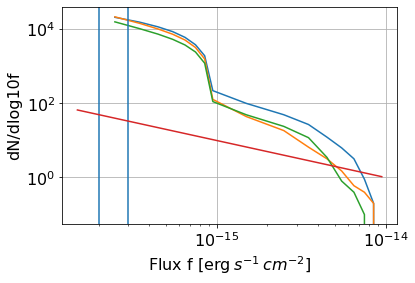

In [350]:
bin_center_counts =  tab_counts['flow'] + 0.5 * (tab_counts['fhigh'] - tab_counts['flow'])
bin_center_counts = bin_center_counts*1e-16

deltaf = (tab_counts['fhigh'] - tab_counts['flow'])

plt.loglog(bin_center_counts, np.sum(tab_counts["dNdlog10f_Ferr"]/deltaf) - np.cumsum(tab_counts["dNdlog10f_Ferr"]/deltaf))
plt.loglog(bin_center_counts, np.sum(tab_counts["dNdlog10f_Calz"]/deltaf) - np.cumsum(tab_counts["dNdlog10f_Calz"]/deltaf))
plt.loglog(bin_center_counts, np.sum(tab_counts["dNdlog10f_Char"]/deltaf) - np.cumsum(tab_counts["dNdlog10f_Char"]/deltaf))

#plt.errorbar(bin_center_counts, tab_counts["dNdlog10f_Ferr"]/deltaf, yerr=tab_counts["dNdlog10f_Ferr_err"]/deltaf, fmt='.')
#plt.errorbar(bin_center_counts, tab_counts["dNdlog10f_Calz"]/deltaf, yerr=tab_counts["dNdlog10f_Calz_err"]/deltaf, fmt='.')
#plt.errorbar(bin_center_counts, tab_counts["dNdlog10f_Char"]/deltaf, yerr=tab_counts["dNdlog10f_Char_err"]/deltaf, fmt='.')

plt.axvline(2e-16)
plt.axvline(3e-16)
#plt.axvline(2)

#plt.plot(bin_center_counts, schechterM(bin_center_counts, *popt), label = 'Schechter fit' )

plt.ylabel("dN/dlog10f")
plt.xlabel("Flux f [erg $s^{-1} cm^{-2}$]")

#plt.ylim(20,2e4)
#plt.xlim(1e-16,2e-15)


plt.plot(bin_center_counts, 1/1e14 * bin_center_counts**(-1))
plt.grid()

In [347]:
np.sum(tab_counts["dNdlog10f_Ferr"]/deltaf) - np.cumsum(tab_counts["dNdlog10f_Ferr"]/deltaf)

0              NaN
1     2.124160e+04
2     1.571460e+04
3     1.173460e+04
4     8.691600e+03
5     6.101600e+03
6     3.848600e+03
7     1.941600e+03
8     2.216000e+02
9     1.004000e+02
10    4.950000e+01
11    2.700000e+01
12    1.230000e+01
13    6.300000e+00
14    3.200000e+00
15    9.000000e-01
16    2.000000e-01
17   -3.637979e-12
dtype: float64

In [338]:
np.cumsum(tab_counts["dNdlog10f_Ferr"]/deltaf) 

0         NaN
1      9908.0
2     15435.0
3     19415.0
4     22458.0
5     25048.0
6     27301.0
7     29208.0
8     30928.0
9     31049.2
10    31100.1
11    31122.6
12    31137.3
13    31143.3
14    31146.4
15    31148.7
16    31149.4
17    31149.6
dtype: float64

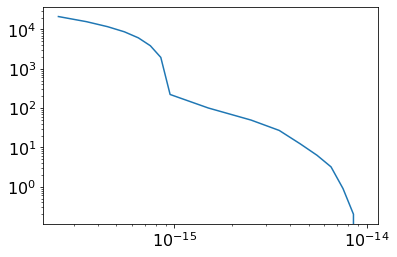

In [341]:
plt.loglog(bin_center_counts, np.sum(tab_counts["dNdlog10f_Ferr"]/deltaf) - np.cumsum(tab_counts["dNdlog10f_Ferr"]/deltaf))

In [324]:
deltaf = (tab_counts['fhigh'] - tab_counts['flow'])

/pbs/throng/lsst/software/desc/common/miniconda/py3.7-4.7.12.1-v2/envs/desc/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


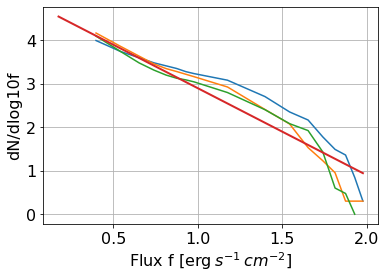

In [402]:
### bin_center_counts =  tab_counts['flow'] + 0.5 * (tab_counts['fhigh'] - tab_counts['flow'])
#bin_center_counts = -2.5*np.log10(bin_center_counts*1e-16)

plt.plot(np.log10(bin_center_counts), np.log10(tab_counts["dNdlog10f_Ferr"]))
plt.plot(np.log10(bin_center_counts), np.log10(tab_counts["dNdlog10f_Calz"]))
plt.plot(np.log10(bin_center_counts), np.log10(tab_counts["dNdlog10f_Char"]))
          
#plt.errorbar(bin_center_counts, tab_counts["dNdlog10f_Ferr"], yerr=tab_counts["dNdlog10f_Ferr_err"], fmt='.')
#plt.errorbar(bin_center_counts, tab_counts["dNdlog10f_Calz"], yerr=tab_counts["dNdlog10f_Calz_err"], fmt='.')
#plt.errorbar(bin_center_counts, tab_counts["dNdlog10f_Char"], yerr=tab_counts["dNdlog10f_Char_err"], fmt='.')

#plt.axvline(2e-16)
#plt.axvline(2)

p0 = (1e3, -3, -1.5, 37)
#plt.plot(bin_center_counts, PLE(bin_center_counts, *p0), label = 'Schechter fit' )

plt.ylabel("dN/dlog10f")
plt.xlabel("Flux f [erg $s^{-1} cm^{-2}$]")

#plt.ylim(1,5e4)
#plt.xlim(35,40)
plt.plot(np.log10(bin_center_counts),  -2.*np.log10(bin_center_counts) + 4.9, lw=2)
plt.grid()

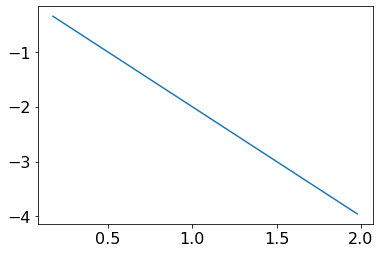

In [393]:
plt.plot(np.log10(bin_center_counts),  -2*np.log10(bin_center_counts))

In [309]:
#bin_center_counts = qso_hist[1][:-1]+(qso_hist[1][1] - qso_hist[1][0])/2

#mrange = (mag_bin_cen<23.4)
p0 = (1e3, -3, -1.5, 37)
popt, pcov = curve_fit(PLE, bin_center_counts[1:], tab_counts["dNdlog10f_Ferr"][1:], p0=p0 , sigma = tab_counts["dNdlog10f_Ferr_err"][1:], maxfev=2000 )
print (popt)

[1000.    -3.    -1.5   37. ]


/pbs/throng/lsst/software/desc/common/miniconda/py3.7-4.7.12.1-v2/envs/desc/lib/python3.7/site-packages/scipy/optimize/minpack.py:755: RuntimeWarning: divide by zero encountered in true_divide
  transform = 1.0 / sigma
/pbs/throng/lsst/software/desc/common/miniconda/py3.7-4.7.12.1-v2/envs/desc/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [274]:
-2.5*np.log10(10)

-2.5

Text(0.5, 0, 'Flux f [erg\u2009$s^{-1}\u2009cm^{-2}$]')

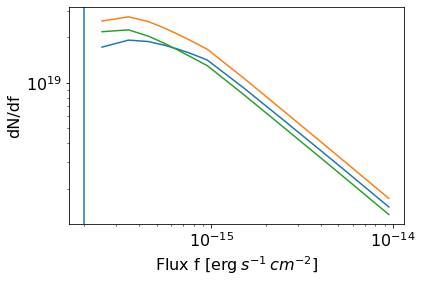

In [258]:
bin_center_counts =  tab_counts['flow'] + 0.5 * (tab_counts['fhigh'] - tab_counts['flow'])
bin_center_counts = bin_center_counts*1e-16

const = 1/(bin_center_counts * np.log(10))

plt.loglog(bin_center_counts, const  * np.cumsum(tab_counts["dNdlog10f_Ferr"]))
plt.loglog(bin_center_counts, const  * np.cumsum(tab_counts["dNdlog10f_Calz"]))
plt.loglog(bin_center_counts, const  * np.cumsum(tab_counts["dNdlog10f_Char"]))
          
#plt.errorbar(bin_center_counts, const  * tab_counts["dNdlog10f_Ferr"], yerr=const  * tab_counts["dNdlog10f_Ferr_err"], fmt='.')
#plt.errorbar(bin_center_counts, const  * tab_counts["dNdlog10f_Calz"], yerr=const  * tab_counts["dNdlog10f_Calz_err"], fmt='.')
#plt.errorbar(bin_center_counts, const  * tab_counts["dNdlog10f_Char"], yerr=const  * tab_counts["dNdlog10f_Char_err"], fmt='.')

plt.axvline(2e-16)

plt.ylabel("dN/df")
plt.xlabel("Flux f [erg $s^{-1} cm^{-2}$]")

In [255]:
(np.sum(tab_counts["dNdlog10f_Ferr"][0:9]) + np.sum(tab_counts["dNdlog10f_Ferr"][9:18])/10)

31149.6

In [252]:
np.log(10)

2.302585092994046

In [213]:
np.sum(tab_counts["dNdlog10f_Calz"]*const)*(bin_center_counts[1]-bin_center_counts[0])

4547.8275332742405

In [214]:
np.sum(tab_counts["dNdlog10f_Char"]*const)*(bin_center_counts[1]-bin_center_counts[0])

3639.0972093982955

In [358]:
plt.plot(np.log10(bin_center), np.log10(tab["dNdlog10f_Ferr"]) - 1,'-o')
plt.plot(np.log10(bin_center), np.log10(tab["dNdlog10f_Calz"]) - 1,'-o')
plt.plot(np.log10(bin_center), np.log10(tab["dNdlog10f_Char"]) - 1,'-o')

plt.axvline(np.log10(2e-16))

plt.ylabel("log10(dN/dlog10f) - 1")
plt.xlabel("log10(Flux [erg $s^{-1} cm^{-2}$])")

#plt.plot(np.log10(bin_center), np.log10(bin_center))

TypeError: loop of ufunc does not support argument 0 of type function which has no callable log10 method

In [187]:
4*np.pi*u.sr.to(u.deg**2)/2.

20626.48062470964

In [ ]:
bin_center_zdistrib =  tab_zdistrib['flow'] + 0.5 * (tab_zdistrib['fhigh'] - tab_zdistrib['flow'])

In [96]:
tab_zdistrib

,flow,fhigh,dN/dz_f3_Ferr,dN/dz_f3_Ferr_err,dN/dz_f3_Cal,dN/dz_f3_Cal_err,dN/dz_f3_Char,dN/dz_f3_Char_err,dN/dz_f2_Ferr,dN/dz_f2_Ferr_err,dN/dz_f2_Cal,dN/dz_f2_Cal_err,dN/dz_f2_Char,dN/dz_f2_Char_err
0,0.9,1.0,3598,50,4493,195,4240,243,7716,103,10057,361,10535,472
1,1.0,1.1,3050,40,3546,169,3083,200,6229,100,8500,344,8014,523
2,1.1,1.2,2467,44,2582,114,1964,121,4475,72,6323,273,4998,472
3,1.2,1.3,2537,45,2409,86,1689,81,4225,64,5463,260,3931,374
4,1.3,1.4,2690,43,2371,76,1623,78,4296,71,5031,221,3455,246
5,1.4,1.5,2193,27,1926,55,1227,60,3384,51,3690,148,2446,178
6,1.5,1.6,2238,33,1890,60,1093,58,3500,60,3387,106,2078,141
7,1.6,1.7,2158,31,1775,49,1006,49,3365,51,3085,106,1747,113
8,1.7,1.8,1951,23,1627,43,943,44,3044,44,2793,77,1524,108


In [365]:
print(np.sum(tab_zdistrib["dN/dz_f2_Ferr"]*(tab_zdistrib['fhigh'] - tab_zdistrib['flow'])))
print(np.sum(tab_zdistrib["dN/dz_f2_Cal"]*(tab_zdistrib['fhigh'] - tab_zdistrib['flow'])))
print(np.sum(tab_zdistrib["dN/dz_f2_Char"]*(tab_zdistrib['fhigh'] - tab_zdistrib['flow'])))

4023.3999999999996
4832.9
3872.7999999999997


## Redshift distribution

In [155]:
def pdf_z_trunc(z, alpha, z0):
    """Redshift distribution function"""
    #alpha, beta, z0 = 1.24, 1.01, 0.51
    return np.heaviside((z>0.9),0)*np.heaviside((z<1.8),0)*(z**alpha)*np.exp(-(z/z0))

Text(0, 0.5, 'dN/dz [deg$^{-2}$]')

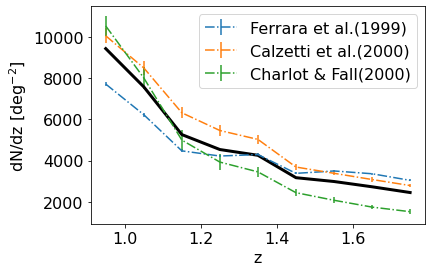

In [156]:
plt.errorbar(bin_center_zdistrib, tab_zdistrib["dN/dz_f2_Ferr"], yerr=tab_zdistrib["dN/dz_f2_Ferr_err"], fmt='-.', label='Ferrara et al.(1999)')
plt.errorbar(bin_center_zdistrib, tab_zdistrib["dN/dz_f2_Cal"], yerr=tab_zdistrib["dN/dz_f2_Cal_err"], fmt='-.', label='Calzetti et al.(2000)')
plt.errorbar(bin_center_zdistrib, tab_zdistrib["dN/dz_f2_Char"], yerr=tab_zdistrib["dN/dz_f2_Char_err"], fmt='-.', label='Charlot & Fall(2000)')

plt.plot(bin_center_zdistrib, 1/3.*(tab_zdistrib["dN/dz_f2_Ferr"]+tab_zdistrib["dN/dz_f2_Cal"]+tab_zdistrib["dN/dz_f2_Char"]), 'k', lw=3)

plt.legend()
plt.xlabel("z")
plt.ylabel("dN/dz [deg$^{-2}$]")



In [167]:
p0 =(0.5, 0.7)

popt1, pcov1 = curve_fit(pdf_z_trunc, bin_center_zdistrib, tab_zdistrib["dN/dz_f2_Ferr"]/np.sum(tab_zdistrib["dN/dz_f2_Ferr"]), \
                         sigma = tab_zdistrib["dN/dz_f2_Ferr_err"]/np.sum(tab_zdistrib["dN/dz_f2_Ferr"]), p0=p0 , maxfev=5000,absolute_sigma=True )
print (popt1)
print (pcov1)

popt2, pcov2 = curve_fit(pdf_z_trunc, bin_center_zdistrib, tab_zdistrib["dN/dz_f2_Cal"]/np.sum(tab_zdistrib["dN/dz_f2_Cal"]), \
                         sigma = tab_zdistrib["dN/dz_f2_Cal_err"]/np.sum(tab_zdistrib["dN/dz_f2_Cal"]), p0=p0 , maxfev=5000,absolute_sigma=True )
print (popt2)
print (pcov2)

popt3, pcov3 = curve_fit(pdf_z_trunc, bin_center_zdistrib, tab_zdistrib["dN/dz_f2_Char"]/np.sum(tab_zdistrib["dN/dz_f2_Char"]), \
                         sigma = tab_zdistrib["dN/dz_f2_Char_err"]/np.sum(tab_zdistrib["dN/dz_f2_Char"]), p0=p0 , maxfev=5000,absolute_sigma=True )
print (popt3)
print (pcov3)

[1.04285405 0.52965031]
[[ 1.47696205e-03 -9.21670309e-05]
 [-9.21670309e-05  6.87531947e-06]]
[0.106482   0.58316767]
[[ 7.96702636e-03 -6.68361087e-04]
 [-6.68361087e-04  6.45360330e-05]]
[-1.37639186  0.67340696]
[[ 0.01927431 -0.00183748]
 [-0.00183748  0.00023356]]


In [404]:
1/3 * (counts_Ferr + counts_Cal + counts_Char)

4256.333333333333

In [406]:
popt2


array([0.106482  , 0.58316767])

Text(0, 0.5, 'p(z)')

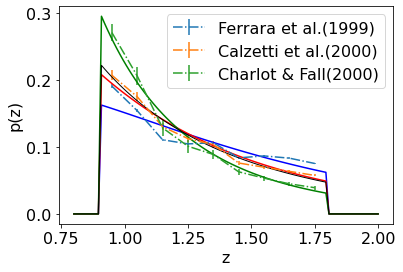

In [185]:
counts_Ferr,counts_Ferr_err = 4036,62 #/deg2
counts_Cal,counts_Cal_err = 4849,192 #/deg2
counts_Char,counts_Char_err = 3884,252 #/deg2

dz = 0.1

plt.errorbar(bin_center_zdistrib, dz*tab_zdistrib["dN/dz_f2_Ferr"]/counts_Ferr, yerr = dz*tab_zdistrib["dN/dz_f2_Ferr_err"]/counts_Ferr, fmt='-.', label='Ferrara et al.(1999)')
plt.errorbar(bin_center_zdistrib, dz*tab_zdistrib["dN/dz_f2_Cal"]/counts_Cal, yerr = dz*tab_zdistrib["dN/dz_f2_Cal_err"]/counts_Cal, fmt='-.', label='Calzetti et al.(2000)')
plt.errorbar(bin_center_zdistrib, dz*tab_zdistrib["dN/dz_f2_Char"]/counts_Char, yerr = dz*tab_zdistrib["dN/dz_f2_Char_err"]/counts_Char, fmt='-.', label='Charlot & Fall(2000)')

mean = 1/3.*(tab_zdistrib["dN/dz_f3_Ferr"]+tab_zdistrib["dN/dz_f3_Cal"]+tab_zdistrib["dN/dz_f3_Char"])
#plt.plot(bin_center_zdistrib, mean/np.sum(mean), 'k', lw=3)

z = np.linspace(0.8,2,100)



plt.plot(z, pdf_z_trunc(z, *popt1),'b')
plt.plot(z, pdf_z_trunc(z, *popt2),'r')
plt.plot(z, pdf_z_trunc(z, *popt3),'g')


plt.plot(z, 1/3. * (pdf_z_trunc(z, *popt1)+pdf_z_trunc(z, *popt2)+pdf_z_trunc(z, *popt3)), 'k',lw=1)

plt.legend()
plt.xlabel("z")
plt.ylabel("p(z)")

